## Assignment : LSTM on Donors Choose

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('preprocessed_data.csv')

In [3]:
data

,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay,price
0,ca,mrs,grades_prek_2,53,1,math_science,appliedsciences health_lifescience,i fortunate enough use fairy tale stem kits cl...,725.05
1,ut,ms,grades_3_5,4,1,specialneeds,specialneeds,imagine 8 9 years old you third grade classroo...,213.03
2,ca,mrs,grades_prek_2,10,1,literacy_language,literacy,having class 24 students comes diverse learner...,329.00
3,ga,mrs,grades_prek_2,2,1,appliedlearning,earlydevelopment,i recently read article giving students choice...,481.04
4,wa,mrs,grades_3_5,2,1,literacy_language,literacy,my students crave challenge eat obstacles brea...,17.74
...,...,...,...,...,...,...,...,...,...
109243,hi,mrs,grades_9_12,5,1,health_sports,teamsports,our day starts 100 students athletes low incom...,143.36
109244,nm,ms,grades_prek_2,3,1,appliedlearning,earlydevelopment other,my students range age four five years old atte...,268.57
109245,il,mrs,grades_3_5,0,1,math_science,appliedsciences environmentalscience,we title 1 school 650 total students our eleme...,399.00
109246,hi,mrs,grades_9_12,1,1,math_science,health_lifescience,i teach many different types students my class...,287.73


In [4]:
y = data['project_is_approved'].values

In [5]:
x = data.drop(['project_is_approved'], axis = 1)

In [6]:
x.shape

(109248, 8)

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=15, test_size=0.25, stratify = y)

In [8]:
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [9]:
print(y_test[:10])

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]]


### Model 1 - Word Embedding

In [10]:
from nltk.tokenize import word_tokenize 
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer, text_to_word_sequence

In [11]:
def processing(x_train,x_test):
    
    tokenizer = Tokenizer(filters='!"#$%&()*+,-./:;<=>?@[\\]^`{|}~\t\n')
    tokenizer.fit_on_texts(x_train)
    train_sequences = tokenizer.texts_to_sequences(x_train)
    word_index = tokenizer.word_index
    vocab_size = len(word_index) + 1
    max_len = max([len(x) for x in train_sequences])
    train_padding = pad_sequences(train_sequences, maxlen=max_len)
    test_sequences = tokenizer.texts_to_sequences(x_test)
    test_padding = pad_sequences(test_sequences, maxlen=max_len)
        
    return train_padding, test_padding, max_len, word_index, vocab_size
    

In [12]:
essay_tr_padding, essay_te_padding , essay_max_len, essay_word_index, essay_vocab_size = processing(x_train['essay'], x_test['essay'])
scst_tr_padding, scst_te_padding , scst_max_len, scst_word_index, scst_vocab_size = processing(x_train['school_state'], x_test['school_state'])
grade_tr_padding, grade_te_padding , grade_max_len, grade_word_index, grade_vocab_size = processing(x_train['project_grade_category'], x_test['project_grade_category'])
cleancat_tr_padding, cleancat_te_padding , cleancat_max_len, cleancat_word_index, cleancat_vocab_size = processing(x_train['clean_categories'], x_test['clean_categories'])
cleansubcat_tr_padding, cleansubcat_te_padding , cleansubcat_max_len, cleansubcat_word_index, cleansubcat_vocab_size = processing(x_train['clean_subcategories'], x_test['clean_subcategories'])
tea_tr_padding, tea_te_padding , tea_max_len, tea_word_index, tea_vocab_size = processing(x_train['teacher_prefix'], x_test['teacher_prefix'])

In [13]:
essay_te_padding[0]

array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,

In [14]:
embedding_dict = {}
file = open('glove/glove.6B.300d.txt', 'r', encoding = 'utf8')
for line in file:
    values = line.split()
    word = values[0]
    vectors = np.asarray(values[1:], 'float32')
    embedding_dict[word] = vectors
file.close()

In [15]:
embedding_matrix = np.zeros((essay_vocab_size, 300))

for word, i in essay_word_index.items():
    if i < essay_vocab_size:
        emb_vec = embedding_dict.get(word)
    if emb_vec is not None:
        embedding_matrix[i] = emb_vec

In [16]:
embedding_matrix.shape

(50491, 300)

In [17]:
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler

In [18]:
def standard_scale(x_train,x_test):

    standard_scaler = StandardScaler()
    standard_scaler.fit(x_train.values.reshape(-1, 1))
    x_train_standard = standard_scaler.transform(x_train.values.reshape(-1,1))
    x_test_standard = standard_scaler.transform(x_test.values.reshape(-1,1))
    
    return x_train_standard, x_test_standard

In [19]:
tr_price_standard, te_price_standard = standard_scale(x_train['price'], x_test['price'])
tr_tea_pre_projects_standard, te_tea_pre_projects_standard = standard_scale(x_train['teacher_number_of_previously_posted_projects'], x_test['teacher_number_of_previously_posted_projects'])

In [20]:
print(tr_price_standard.shape)
print(tr_tea_pre_projects_standard.shape)

(81936, 1)
(81936, 1)


In [21]:
num_fea_tr = np.hstack((tr_price_standard, tr_tea_pre_projects_standard))
num_fea_te = np.hstack((te_price_standard, te_tea_pre_projects_standard))

In [22]:
num_fea_tr[0].shape

(2,)

In [23]:
from keras.models import Sequential
from keras.layers import Embedding
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dense, InputLayer, Dropout, Flatten, BatchNormalization, Conv1D
from keras.layers import Concatenate, Dense, LSTM, Input, concatenate
from keras.layers import MaxPooling1D
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense,Input,Activation
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras import initializers
import datetime
import os
import sys
from keras.preprocessing.text import Tokenizer
from keras.utils import to_categorical
from keras.layers import Activation, Conv2D, Input, Embedding, Reshape, MaxPool2D,MaxPool1D, Concatenate, Flatten, Dropout, Dense, Conv1D
from keras.callbacks import ModelCheckpoint
from keras.models import Model
from keras.initializers import he_normal,glorot_normal
from keras.optimizers import Adam
from keras.regularizers import l1,l2
import tensorflow as tf
from sklearn.metrics import roc_auc_score
from sklearn.datasets import make_classification
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
from keras.callbacks import Callback, EarlyStopping
import warnings
warnings.filterwarnings("ignore")
tf.compat.v1.disable_eager_execution()

In [24]:
tf.keras.backend.clear_session()

essay_input_layer = Input(shape=(essay_max_len),)
essay_embedded_layer = Embedding(essay_vocab_size, 300, weights=[embedding_matrix], input_length= essay_max_len,trainable=False)(essay_input_layer)
layer_1 = LSTM(100, return_sequences=True)(essay_embedded_layer)
flatten = Flatten()(layer_1)

scst_input_layer = Input(shape=(scst_max_len),)
scst_embedded_layer = Embedding(scst_vocab_size, 10, input_length= scst_max_len)(scst_input_layer)
flatten_1 = Flatten()(scst_embedded_layer)

grade_input_layer = Input(shape=(grade_max_len),)
grade_embedded_layer = Embedding(grade_vocab_size, 10, input_length= grade_max_len)(grade_input_layer)
flatten_2 = Flatten()(grade_embedded_layer)

cleancat_input_layer = Input(shape=(cleancat_max_len),)
cleancat_embedded_layer = Embedding(cleancat_vocab_size, 10, input_length= cleancat_max_len)(cleancat_input_layer)
flatten_3 = Flatten()(cleancat_embedded_layer)

cleansubcat_input_layer = Input(shape=(cleansubcat_max_len),)
cleansubcat_embedded_layer = Embedding(cleansubcat_vocab_size, 10, input_length= cleansubcat_max_len)(cleansubcat_input_layer) 
flatten_4 = Flatten()(cleansubcat_embedded_layer)

tea_input_layer = Input(shape=(tea_max_len),)
tea_embedded_layer = Embedding(tea_vocab_size, 10)(tea_input_layer)
flatten_5 = Flatten()(tea_embedded_layer)

num_fea_input_layer = Input(shape=num_fea_tr[0].shape)
num_dense = Dense(10, activation='relu', kernel_initializer= 'he_normal', kernel_regularizer=l2(0.0001))(num_fea_input_layer)

concat = concatenate([flatten, flatten_1, flatten_2, flatten_3, flatten_4, flatten_5, num_dense])

dense_layer1 = Dense(256, activation='relu', kernel_initializer='he_normal', kernel_regularizer=l2(0.0001))(concat)

dropout1 = Dropout(0.5)(dense_layer1)

dense_layer2 = Dense(120,activation='relu',kernel_initializer='he_normal', kernel_regularizer=l2(0.0001))(dropout1)

dropout2 = Dropout(0.5)(dense_layer2)

output_layer = Dense(2, activation='softmax')(dropout2)

model1 = Model(inputs=[essay_input_layer, scst_input_layer, grade_input_layer, cleancat_input_layer, cleansubcat_input_layer, tea_input_layer, num_fea_input_layer], outputs=output_layer)

model1.run_eagerly = True

model1.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 339)]        0           []                               
                                                                                                  
 embedding (Embedding)          (None, 339, 300)     15147300    ['input_1[0][0]']                
                                                                                                  
 input_2 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 input_3 (InputLayer)           [(None, 1)]          0           []                               
                                                                                              

In [25]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score
from keras.utils import np_utils
from keras.callbacks import Callback
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import LearningRateScheduler

In [26]:
%load_ext tensorboard

In [27]:
filepath="best_model_1/weights-{epoch:02d}-{val_accuracy:.4f}.hdf5"
checkpoint = ModelCheckpoint(filepath=filepath, monitor='val_auc',  verbose=1, save_best_only=True, mode='max')

earlystop = EarlyStopping(monitor='val_accuracy', min_delta=0.0001, patience=3, verbose=1)

reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.1, patience=3, verbose = 1, mode= 'auto' , min_lr=0.0001)

log_dir = os.path.join("logs",'fits', datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir,histogram_freq=1,write_graph=True)


callback_list = [checkpoint, earlystop, reduce_lr, tensorboard_callback]

In [28]:
#AUC score
def auc( y_true, y_pred ) :
    score = tf.compat.v1.py_func( lambda y_true, y_pred : roc_auc_score( y_true, y_pred, average='macro', sample_weight=None).astype('float32'),
                        [y_true, y_pred],
                        'float32',
                        stateful=True,
                        name='sklearnAUC' )
    return score

In [30]:
model1.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(lr=0.0006,decay = 1e-4), metrics=['accuracy', auc])

Instructions for updating:
tf.py_func is deprecated in TF V2. Instead, there are two
    options available in V2.
    - tf.py_function takes a python function which manipulates tf eager
    tensors instead of numpy arrays. It's easy to convert a tf eager tensor to
    an ndarray (just call tensor.numpy()) but having access to eager tensors
    means `tf.py_function`s can use accelerators such as GPUs as well as
    being differentiable using a gradient tape.
    - tf.numpy_function maintains the semantics of the deprecated tf.py_func
    (it is not differentiable, and manipulates numpy arrays). It drops the
    stateful argument making all functions stateful.
    


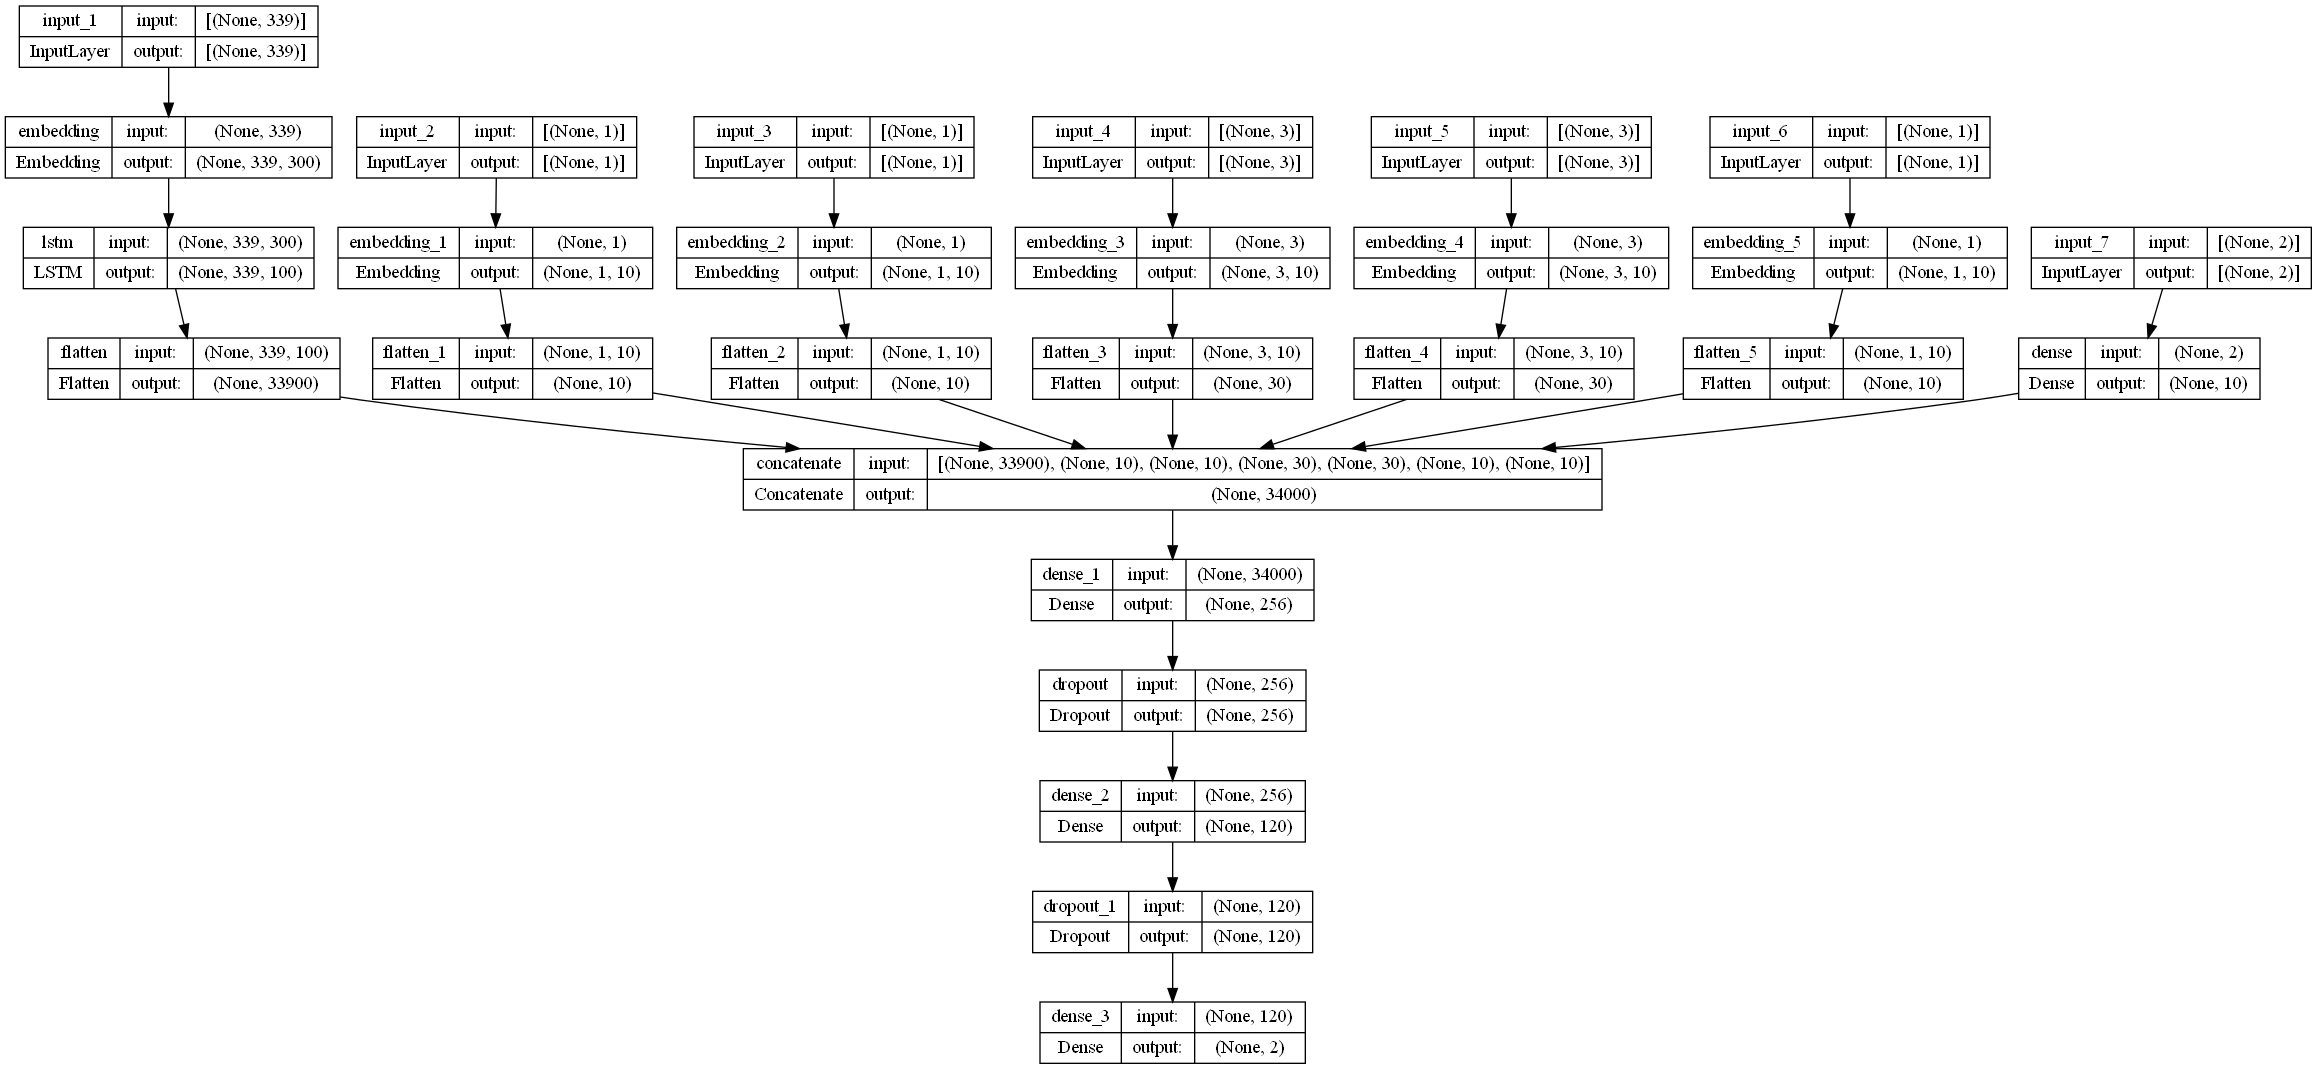

In [31]:
from keras.utils.vis_utils import plot_model
plot_model(model1, to_file='model1_plot.png', show_shapes=True, show_layer_names=True)

In [32]:
model1.fit([essay_tr_padding, scst_tr_padding, grade_tr_padding, cleancat_tr_padding, cleansubcat_tr_padding, tea_tr_padding, num_fea_tr], y_train, epochs = 3, verbose = 1, batch_size=64, validation_data=([essay_te_padding, scst_te_padding, grade_te_padding, cleancat_te_padding, cleansubcat_te_padding, tea_te_padding, num_fea_te], y_test), callbacks = callback_list)

Train on 81936 samples, validate on 27312 samples
Epoch 1/3
81936/81936 [==============================] - ETA: 0s - loss: 0.4761 - accuracy: 0.8489 - auc: 0.6862
Epoch 1: val_auc improved from -inf to 0.73839, saving model to best_model_1\weights-01-0.8526.hdf5
81936/81936 [==============================] - 994s 12ms/sample - loss: 0.4761 - accuracy: 0.8489 - auc: 0.6862 - val_loss: 0.4412 - val_accuracy: 0.8526 - val_auc: 0.7384 - lr: 6.0000e-04
Epoch 2/3
81936/81936 [==============================] - ETA: 0s - loss: 0.4413 - accuracy: 0.8555 - auc: 0.7518
Epoch 2: val_auc improved from 0.73839 to 0.74934, saving model to best_model_1\weights-02-0.8573.hdf5
81936/81936 [==============================] - 994s 12ms/sample - loss: 0.4413 - accuracy: 0.8555 - auc: 0.7518 - val_loss: 0.4403 - val_accuracy: 0.8573 - val_auc: 0.7493 - lr: 6.0000e-04
Epoch 3/3
81936/81936 [==============================] - ETA: 0s - loss: 0.4318 - accuracy: 0.8638 - auc: 0.7968
Epoch 3: val_auc did not impro

In [33]:
%tensorboard --logdir logs

Reusing TensorBoard on port 6006 (pid 16096), started 2 days, 7:22:14 ago. (Use '!kill 16096' to kill it.)

In [34]:
!rm -rf ./logs/

'rm' is not recognized as an internal or external command,
operable program or batch file.


## MODEL-II (Using IDF Values)

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt

In [36]:
vectorizer = TfidfVectorizer(min_df=1)
X = vectorizer.fit_transform(x_train['essay'])
idf = vectorizer.idf_
idf_scores = dict(zip(vectorizer.get_feature_names(), idf))

Text(0, 0.5, 'IDF score')

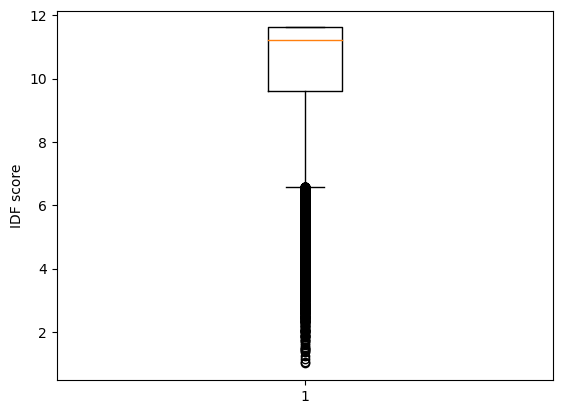

In [37]:
plt.boxplot(idf)
plt.ylabel("IDF score")

In [38]:
print("The 25 percentile of idf score is :", np.percentile(idf,[25]))
print("The 75 percentile of idf score is :",np.percentile(idf,[75]))

The 25 percentile of idf score is : [9.60565574]
The 75 percentile of idf score is : [11.62055876]


In [39]:
iqr = (np.percentile(idf,[75][0]) - np.percentile(idf,[25][0]))

In [40]:
iqr

2.014903020542265

In [41]:
lower_bound = 2
upper_bound = 11

In [42]:
# ran = list(range(101))
# per = [np.percentile(vectorizer.idf_,[i][0]) for i in ran]
# # for i in ran:
# #     fig = plt.figure()
# #     ax = fig.add_axes([0, 0, 1, 1])
# #     ax.bar(i, np.percentile(vectorizer.idf_,[i]))
    


In [43]:
# fig = plt.figure()
# ax = fig.add_axes([0, 0, 1, 1])
# ax.bar(ran, per, color = ['red', 'blue', 'g', 'y'], width = 0.8)

In [44]:
idf_scores

{'00': 7.213839510451187,
 '000': 5.957598277579494,
 '000s': 11.62055875771544,
 '001': 11.215093649607276,
 '002': 11.62055875771544,
 '003': 11.62055875771544,
 '00am': 10.01112084528134,
 '00p': 11.62055875771544,
 '00pm': 9.605655737173175,
 '01': 10.52194646904733,
 '01075rm': 11.62055875771544,
 '01g': 11.62055875771544,
 '01ip': 11.215093649607276,
 '02': 10.704268025841285,
 '022x10': 11.62055875771544,
 '024': 11.62055875771544,
 '02810010': 11.62055875771544,
 '03': 10.116481360939165,
 '030': 11.215093649607276,
 '034': 11.62055875771544,
 '04': 11.215093649607276,
 '041': 11.62055875771544,
 '05': 10.01112084528134,
 '050': 11.215093649607276,
 '059': 11.62055875771544,
 '05a': 11.62055875771544,
 '05pm': 11.62055875771544,
 '06': 10.927411577155494,
 '060': 11.62055875771544,
 '07': 10.927411577155494,
 '072': 11.62055875771544,
 '074': 11.62055875771544,
 '076': 11.62055875771544,
 '08': 10.52194646904733,
 '084': 11.62055875771544,
 '09': 10.704268025841285,
 '0my': 11.

In [45]:
features = []

for feature, idf in idf_scores.items():
    if idf >= lower_bound and idf <= upper_bound:
        features.append(feature)

In [46]:
vocab_size_tfidf = len(features) + 1

In [47]:
len(features)

25028

In [48]:
from tqdm import tqdm
import time

common_elements = []

for i in tqdm(range(len(x_train['essay'].iloc[::]))): 

    common = []

    a = x_train['essay'].iloc[i].split()

    for j in a:
        if j in features:
            common.append(j)

    sen = ' '.join(common)

    common_elements.append(sen)

100%|██████████| 81936/81936 [44:38<00:00, 30.59it/s]


In [49]:
x_train_idf_mod = pd.Series(common_elements)

In [50]:
essay_idf_tr_padding, essay_idf_te_padding , essay_idf_max_len, essay_idf_word_index, essay_idf_vocab_size = processing(x_train_idf_mod, x_test['essay'])

In [51]:
embedding_mat = np.zeros((essay_idf_vocab_size, 300))

for word, i in essay_idf_word_index.items():
    if i < essay_idf_vocab_size:
        emb_vector = embedding_dict.get(word)
    if emb_vector is not None:
        embedding_mat[i] = emb_vector

In [52]:
tf.keras.backend.clear_session()

essay_idf_input_layer = Input(shape=(essay_idf_max_len),)
essay_idf_embedded_layer = Embedding(essay_idf_vocab_size, 300, weights=[embedding_mat], input_length= essay_idf_max_len,trainable=False)(essay_idf_input_layer)
layer_1 = LSTM(100, return_sequences=True)(essay_idf_embedded_layer)
flatten = Flatten()(layer_1)

scst_input_layer = Input(shape=(scst_max_len),)
scst_embedded_layer = Embedding(scst_vocab_size, 10, input_length= scst_max_len)(scst_input_layer)
flatten_1 = Flatten()(scst_embedded_layer)

grade_input_layer = Input(shape=(grade_max_len),)
grade_embedded_layer = Embedding(grade_vocab_size, 10, input_length= grade_max_len)(grade_input_layer)
flatten_2 = Flatten()(grade_embedded_layer)

cleancat_input_layer = Input(shape=(cleancat_max_len),)
cleancat_embedded_layer = Embedding(cleancat_vocab_size, 10, input_length= cleancat_max_len)(cleancat_input_layer)
flatten_3 = Flatten()(cleancat_embedded_layer)

cleansubcat_input_layer = Input(shape=(cleansubcat_max_len),)
cleansubcat_embedded_layer = Embedding(cleansubcat_vocab_size, 10, input_length= cleansubcat_max_len)(cleansubcat_input_layer) 
flatten_4 = Flatten()(cleansubcat_embedded_layer)

tea_input_layer = Input(shape=(tea_max_len),)
tea_embedded_layer = Embedding(tea_vocab_size, 10)(tea_input_layer)
flatten_5 = Flatten()(tea_embedded_layer)

num_fea_input_layer = Input(shape=num_fea_tr[0].shape)
num_dense = Dense(10, activation='relu', kernel_initializer= 'he_normal', kernel_regularizer=l2(0.0001))(num_fea_input_layer)

concat = concatenate([flatten, flatten_1, flatten_2, flatten_3, flatten_4, flatten_5, num_dense])

dense_layer1 = Dense(256, activation='relu', kernel_initializer='he_normal', kernel_regularizer=l2(0.0001))(concat)

dropout1 = Dropout(0.5)(dense_layer1)

dense_layer2 = Dense(120,activation='relu',kernel_initializer='he_normal', kernel_regularizer=l2(0.0001))(dropout1)

dropout2 = Dropout(0.5)(dense_layer2)

output_layer = Dense(2, activation='softmax')(dropout2)

model2 = Model(inputs=[essay_idf_input_layer, scst_input_layer, grade_input_layer, cleancat_input_layer, cleansubcat_input_layer, tea_input_layer, num_fea_input_layer], outputs=output_layer)

model2.run_eagerly = True

model2.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 294)]        0           []                               
                                                                                                  
 embedding (Embedding)          (None, 294, 300)     7508700     ['input_1[0][0]']                
                                                                                                  
 input_2 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 input_3 (InputLayer)           [(None, 1)]          0           []                               
                                                                                              

In [53]:
filepath="best_model_2/weights-{epoch:02d}-{val_accuracy:.4f}.hdf5"
checkpoint = ModelCheckpoint(filepath=filepath, monitor='val_auc',  verbose=1, save_best_only=True, mode='max')

earlystop = EarlyStopping(monitor='val_accuracy', min_delta=0.0001, patience=3, verbose=1)

reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.1, patience=3, verbose = 1, mode= 'auto' , min_lr=0.0001)

log_dir = os.path.join("logs",'fits', datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir,histogram_freq=1,write_graph=True)


callback_list = [checkpoint, earlystop, reduce_lr, tensorboard_callback]

In [55]:
model2.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(lr=0.0006,decay = 1e-4),metrics=['accuracy', auc])

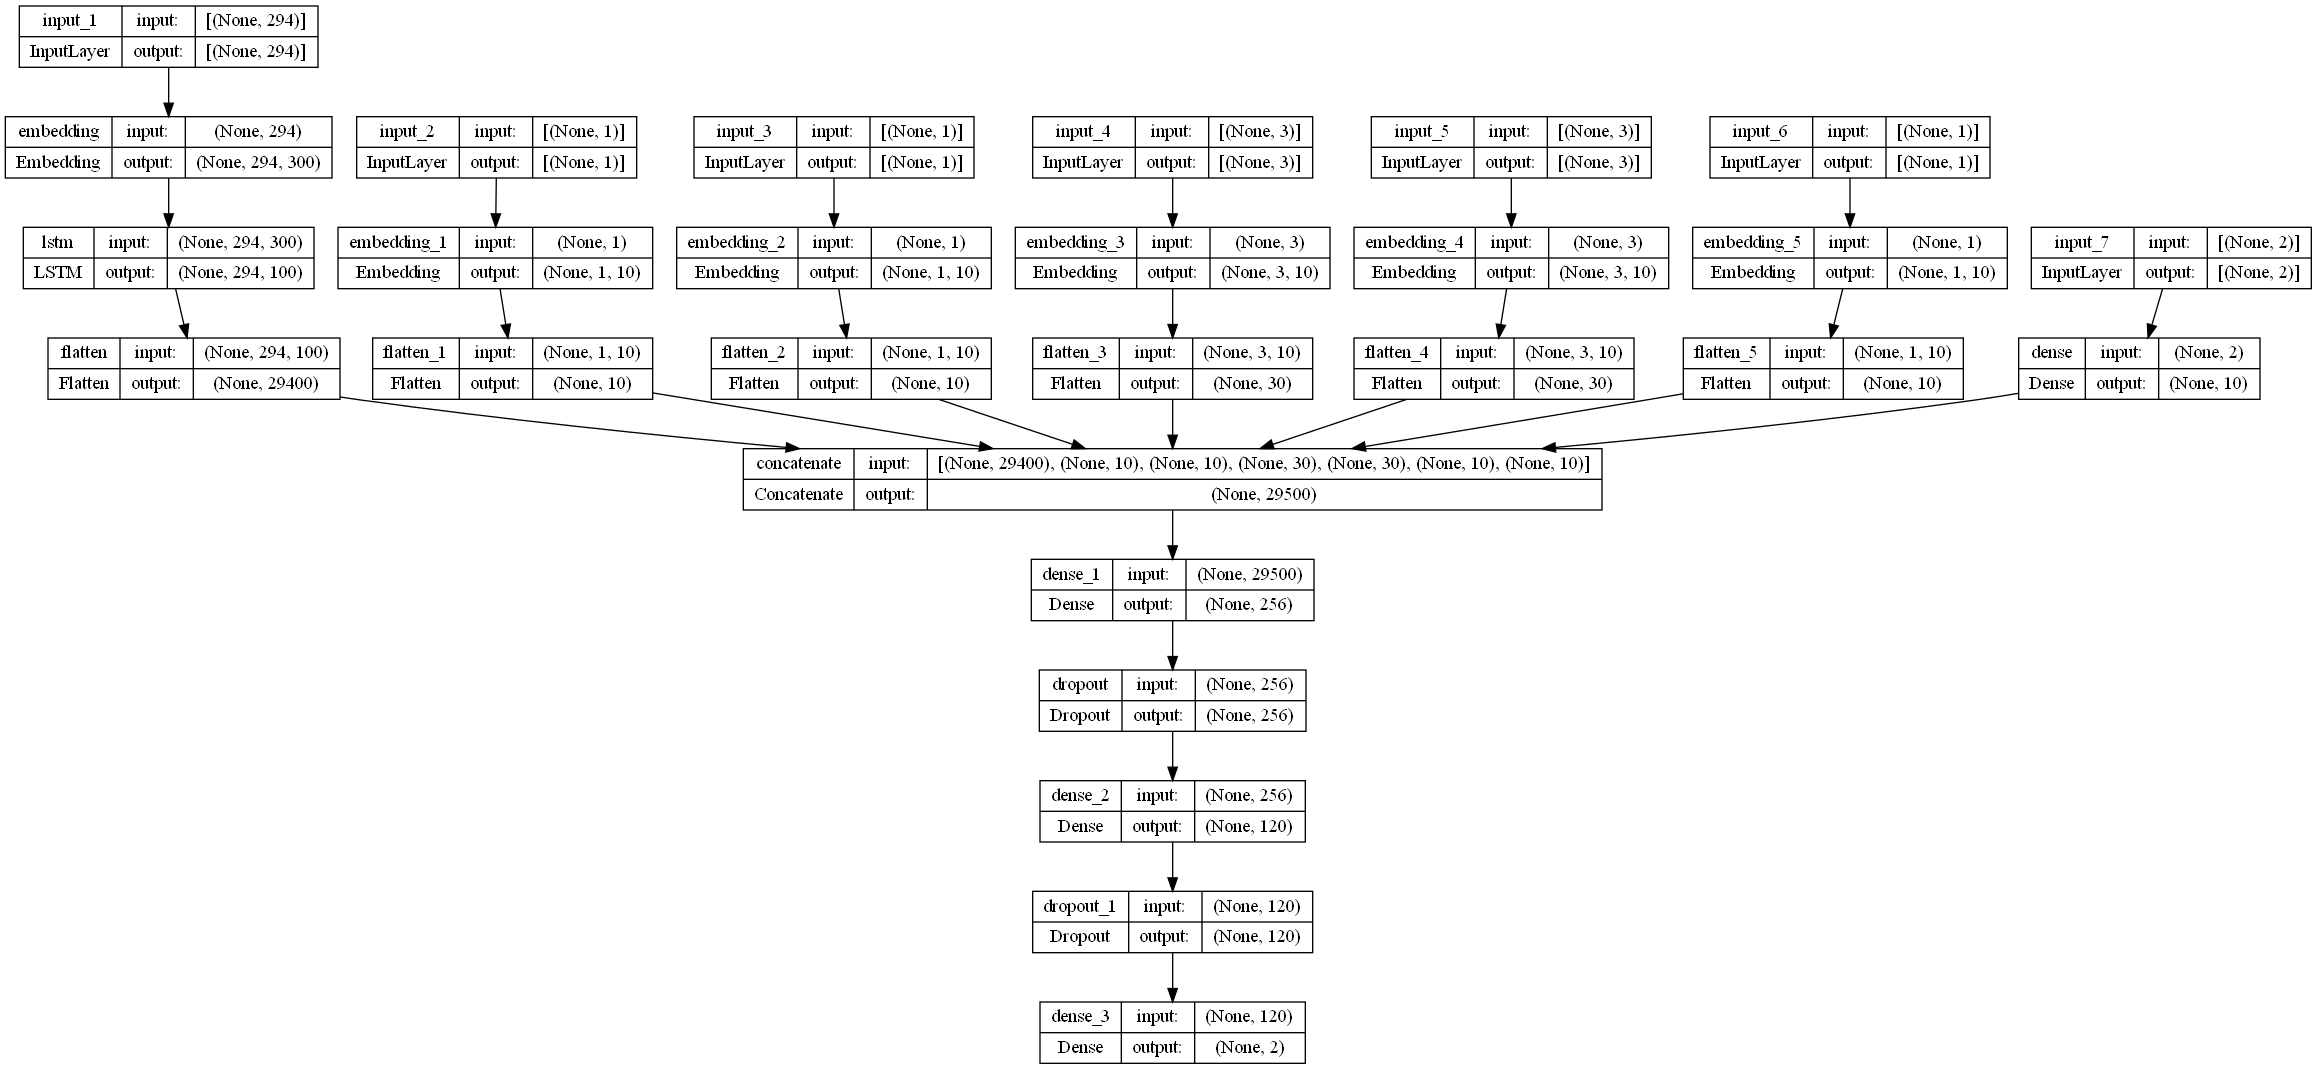

In [56]:
from keras.utils.vis_utils import plot_model
plot_model(model2, to_file='model2_plot.png', show_shapes=True, show_layer_names=True)

In [57]:
model2.fit([essay_idf_tr_padding, scst_tr_padding, grade_tr_padding, cleancat_tr_padding, cleansubcat_tr_padding, tea_tr_padding, num_fea_tr], y_train, epochs = 3, verbose = 1, batch_size=64, validation_data=([essay_idf_te_padding, scst_te_padding, grade_te_padding, cleancat_te_padding, cleansubcat_te_padding, tea_te_padding, num_fea_te], y_test), callbacks = callback_list)

Train on 81936 samples, validate on 27312 samples
Epoch 1/3
81936/81936 [==============================] - ETA: 0s - loss: 0.4715 - accuracy: 0.8490 - auc: 0.6862
Epoch 1: val_auc improved from -inf to 0.74105, saving model to best_model_2\weights-01-0.8555.hdf5
81936/81936 [==============================] - 789s 10ms/sample - loss: 0.4715 - accuracy: 0.8490 - auc: 0.6862 - val_loss: 0.4432 - val_accuracy: 0.8555 - val_auc: 0.7411 - lr: 6.0000e-04
Epoch 2/3
81936/81936 [==============================] - ETA: 0s - loss: 0.4373 - accuracy: 0.8551 - auc: 0.7497
Epoch 2: val_auc improved from 0.74105 to 0.74740, saving model to best_model_2\weights-02-0.8572.hdf5
81936/81936 [==============================] - 793s 10ms/sample - loss: 0.4373 - accuracy: 0.8551 - auc: 0.7497 - val_loss: 0.4303 - val_accuracy: 0.8572 - val_auc: 0.7474 - lr: 6.0000e-04
Epoch 3/3
81936/81936 [==============================] - ETA: 0s - loss: 0.4227 - accuracy: 0.8626 - auc: 0.7930
Epoch 3: val_auc did not impro

In [58]:
%tensorboard --logdir logs

Reusing TensorBoard on port 6006 (pid 16096), started 2 days, 8:46:53 ago. (Use '!kill 16096' to kill it.)

In [59]:
!rm -rf ./logs/

'rm' is not recognized as an internal or external command,
operable program or batch file.


## MODEL-III

### Bag of Words representation of categorical feature "School State"

In [60]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [61]:
vectorizer = CountVectorizer()
vectorizer.fit(x_train['school_state'].values)

CountVectorizer()

In [62]:
x_train_school_ohe = vectorizer.transform(x_train['school_state'].values)
x_test_school_ohe = vectorizer.transform(x_test['school_state'].values)

In [63]:
print(x_train_school_ohe.shape, y_train.shape)
print(x_test_school_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())

(81936, 51) (81936, 2)
(27312, 51) (27312, 2)
['ak', 'al', 'ar', 'az', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga', 'hi', 'ia', 'id', 'il', 'in', 'ks', 'ky', 'la', 'ma', 'md', 'me', 'mi', 'mn', 'mo', 'ms', 'mt', 'nc', 'nd', 'ne', 'nh', 'nj', 'nm', 'nv', 'ny', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx', 'ut', 'va', 'vt', 'wa', 'wi', 'wv', 'wy']


### Bag of Words representation of categorical feature "Teacher_Prefix"

In [64]:
vectorizer = CountVectorizer()
vectorizer.fit(x_train['teacher_prefix'].values)

CountVectorizer()

In [65]:
x_train_teacher_ohe = vectorizer.transform(x_train['teacher_prefix'].values)
x_test_teacher_ohe = vectorizer.transform(x_test['teacher_prefix'].values)

In [66]:
print(x_train_teacher_ohe.shape, y_train.shape)
print(x_test_teacher_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())

(81936, 5) (81936, 2)
(27312, 5) (27312, 2)
['dr', 'mr', 'mrs', 'ms', 'teacher']


### Bag of Words representation of categorical feature "Poject_Grade_Category"

In [67]:
vectorizer = CountVectorizer()
vectorizer.fit(x_train['project_grade_category'].values)

CountVectorizer()

In [68]:
x_train_grade_ohe = vectorizer.transform(x_train['project_grade_category'].values)
x_test_grade_ohe = vectorizer.transform(x_test['project_grade_category'].values)

In [69]:
print(x_train_grade_ohe.shape, y_train.shape)
print(x_test_grade_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())

(81936, 4) (81936, 2)
(27312, 4) (27312, 2)
['grades_3_5', 'grades_6_8', 'grades_9_12', 'grades_prek_2']


### Bag of Words representation of categorical feature "Clean_Categoroies"

In [70]:
vectorizer = CountVectorizer()
vectorizer.fit(x_train['clean_categories'].values)

CountVectorizer()

In [71]:
x_train_cleancat_ohe = vectorizer.transform(x_train['clean_categories'].values)
x_test_cleancat_ohe = vectorizer.transform(x_test['clean_categories'].values)

In [72]:
print(x_train_cleancat_ohe.shape, y_train.shape)
print(x_test_cleancat_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())

(81936, 9) (81936, 2)
(27312, 9) (27312, 2)
['appliedlearning', 'care_hunger', 'health_sports', 'history_civics', 'literacy_language', 'math_science', 'music_arts', 'specialneeds', 'warmth']


### Bag of Words representation of categorical feature "Clean_Subcategoroies"

In [73]:
vectorizer = CountVectorizer()
vectorizer.fit(x_train['clean_subcategories'].values)

CountVectorizer()

In [74]:
x_train_subcat_ohe = vectorizer.transform(x_train['clean_subcategories'].values)
x_test_subcat_ohe = vectorizer.transform(x_test['clean_subcategories'].values)

In [75]:
print(x_train_subcat_ohe.shape, y_train.shape)
print(x_test_subcat_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())

(81936, 30) (81936, 2)
(27312, 30) (27312, 2)
['appliedsciences', 'care_hunger', 'charactereducation', 'civics_government', 'college_careerprep', 'communityservice', 'earlydevelopment', 'economics', 'environmentalscience', 'esl', 'extracurricular', 'financialliteracy', 'foreignlanguages', 'gym_fitness', 'health_lifescience', 'health_wellness', 'history_geography', 'literacy', 'literature_writing', 'mathematics', 'music', 'nutritioneducation', 'other', 'parentinvolvement', 'performingarts', 'socialsciences', 'specialneeds', 'teamsports', 'visualarts', 'warmth']


### Standardized numerical features

In [76]:
print(tr_price_standard.shape, y_train.shape)
print(te_price_standard.shape, y_test.shape)

(81936, 1) (81936, 2)
(27312, 1) (27312, 2)


In [77]:
print(tr_tea_pre_projects_standard.shape, y_train.shape)
print(te_tea_pre_projects_standard.shape, y_test.shape)

(81936, 1) (81936, 2)
(27312, 1) (27312, 2)


## Concatinating all the features

In [78]:
from scipy.sparse import hstack

In [79]:
x_tr = hstack((x_train_school_ohe, x_train_teacher_ohe, x_train_grade_ohe, x_train_cleancat_ohe, x_train_subcat_ohe, tr_price_standard, tr_tea_pre_projects_standard)).todense()
x_te = hstack((x_test_school_ohe, x_test_teacher_ohe, x_test_grade_ohe, x_test_cleancat_ohe, x_test_subcat_ohe, te_price_standard, te_tea_pre_projects_standard)).todense()

In [80]:
x_tr = np.resize(x_tr,new_shape=(81936,101,1))
x_te = np.resize(x_te,new_shape=(27312,101,1))

In [81]:
print('Final Data Matrix')
print(x_tr.shape, y_train.shape)
print(x_te.shape, y_test.shape)

Final Data Matrix
(81936, 101, 1) (81936, 2)
(27312, 101, 1) (27312, 2)


In [82]:
tf.keras.backend.clear_session()

input_1 = Input(shape=(essay_max_len),)
essay_embedded_layer = Embedding(essay_vocab_size, 300, weights=[embedding_matrix], input_length= essay_max_len,trainable=False)(input_1)
layer_1 = LSTM(100, return_sequences=True)(essay_embedded_layer)
flatten = Flatten()(layer_1)

input_2 = Input(shape=(101,1))
convolv1 = Conv1D(128, 4, activation="relu", padding="same")(input_2)
convolv2 = Conv1D(64, 4, activation="relu", padding="same")(convolv1)
flatten_1 = Flatten()(convolv2)

concat = concatenate([flatten,flatten_1])

dense_layer1 = Dense(256, activation='relu', kernel_initializer='he_normal', kernel_regularizer=l2(0.0001))(concat)

dropout1 = Dropout(0.5)(dense_layer1)

dense_layer2 = Dense(120,activation='relu',kernel_initializer='he_normal', kernel_regularizer=l2(0.0001))(dropout1)

dropout2 = Dropout(0.5)(dense_layer2)

dense_layer3 = Dense(60,activation='relu',kernel_initializer='he_normal', kernel_regularizer=l2(0.0001))(dropout2)

output_layer = Dense(2, activation='softmax')(dense_layer3)

model3 = Model(inputs=[input_1, input_2], outputs=output_layer)

model3.run_eagerly = True

model3.summary()



Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 339)]        0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 101, 1)]     0           []                               
                                                                                                  
 embedding (Embedding)          (None, 339, 300)     15147300    ['input_1[0][0]']                
                                                                                                  
 conv1d (Conv1D)                (None, 101, 128)     640         ['input_2[0][0]']                
                                                                                              

In [83]:
filepath="best_model_3/weights-{epoch:02d}-{val_accuracy:.4f}.hdf5"
checkpoint = ModelCheckpoint(filepath=filepath, monitor='val_auc',  verbose=1, save_best_only=True, mode='max')

earlystop = EarlyStopping(monitor='val_accuracy', min_delta=0.0001, patience=3, verbose=1)

reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.1, patience=3, verbose = 1, mode= 'auto' , min_lr=0.0001)

log_dir = os.path.join("logs",'fits', datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir,histogram_freq=1,write_graph=True)


callback_list = [checkpoint, earlystop, reduce_lr, tensorboard_callback]

In [85]:
model3.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(lr=0.0006,decay = 1e-4),metrics=['accuracy', auc])

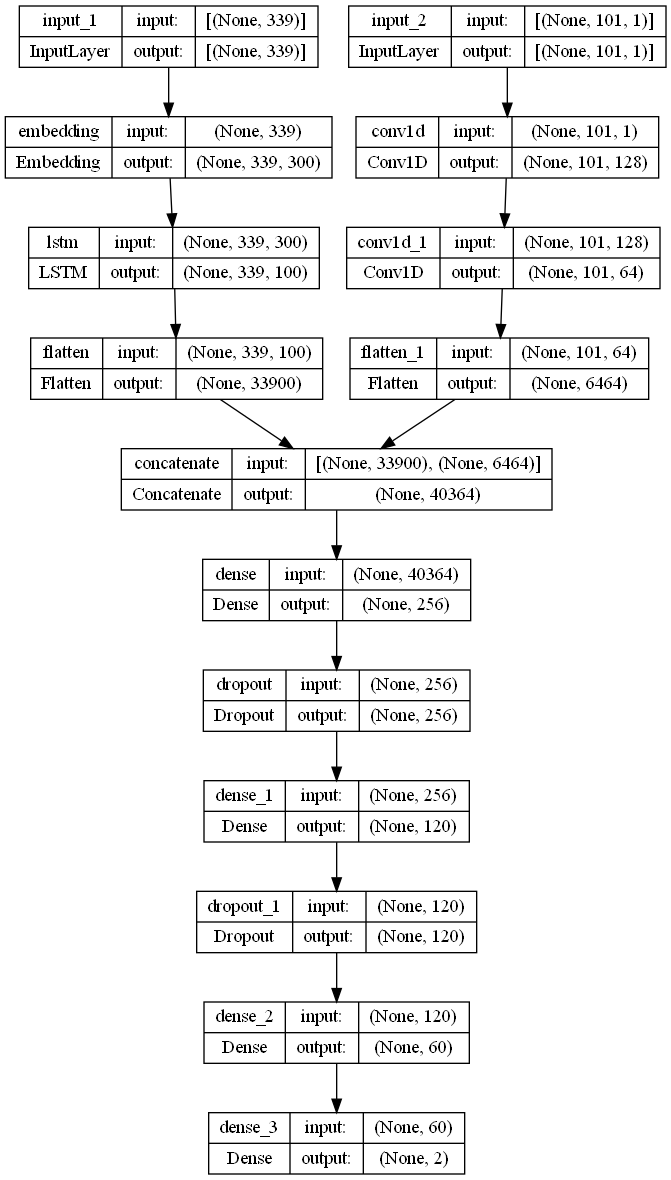

In [86]:
from keras.utils.vis_utils import plot_model
plot_model(model3, to_file='model3_plot.png', show_shapes=True, show_layer_names=True)

In [87]:
model3.fit([essay_tr_padding, x_tr], y_train, epochs = 3, verbose = 1, batch_size=64, validation_data=([essay_te_padding, x_te], y_test), callbacks = callback_list)

Train on 81936 samples, validate on 27312 samples
Epoch 1/3
81936/81936 [==============================] - ETA: 0s - loss: 0.4813 - accuracy: 0.8487 - auc: 0.6916
Epoch 1: val_auc improved from -inf to 0.74091, saving model to best_model_3\weights-01-0.8556.hdf5
81936/81936 [==============================] - 1075s 13ms/sample - loss: 0.4813 - accuracy: 0.8487 - auc: 0.6916 - val_loss: 0.4789 - val_accuracy: 0.8556 - val_auc: 0.7409 - lr: 6.0000e-04
Epoch 2/3
81936/81936 [==============================] - ETA: 0s - loss: 0.4515 - accuracy: 0.8536 - auc: 0.7504
Epoch 2: val_auc improved from 0.74091 to 0.75332, saving model to best_model_3\weights-02-0.8558.hdf5
81936/81936 [==============================] - 1066s 13ms/sample - loss: 0.4515 - accuracy: 0.8536 - auc: 0.7504 - val_loss: 0.4573 - val_accuracy: 0.8558 - val_auc: 0.7533 - lr: 6.0000e-04
Epoch 3/3
81936/81936 [==============================] - ETA: 0s - loss: 0.4412 - accuracy: 0.8611 - auc: 0.7864
Epoch 3: val_auc did not imp

In [88]:
%tensorboard --logdir logs

Reusing TensorBoard on port 6006 (pid 16096), started 2 days, 9:40:24 ago. (Use '!kill 16096' to kill it.)

## SUMMERY

In [90]:
from prettytable import PrettyTable
summery =PrettyTable()
summery.field_names = ["Model No.", "val_accuracy", "val_AUC"]
summery.add_row(["1", 0.8573, 0.7493])
summery.add_row(["2", 0.8572, 0.7477])
summery.add_row(["3", 0.8558, 0.7533])
print(summery)

+-----------+--------------+---------+
| Model No. | val_accuracy | val_AUC |
+-----------+--------------+---------+
|     1     |    0.8573    |  0.7493 |
|     2     |    0.8572    |  0.7477 |
|     3     |    0.8558    |  0.7533 |
+-----------+--------------+---------+
